### **Project Title: Kidney Disease Progression Prediction**  

#### **Introduction**  
Chronic Kidney Disease (CKD) is a serious health condition where kidney function slowly declines over time. Early detection is important to prevent further damage. In this project, we use machine learning to predict CKD based on 14 medical features like blood pressure, hemoglobin levels, and creatinine levels. The dataset used for this project is available on **[Kaggle](https://www.kaggle.com/datasets/abhia1999/chronic-kidney-disease)**.  

#### **Overview**  
This is a **classification problem**, where the goal is to predict whether a person has CKD or not. We use machine learning models like **Random Forest, XGBoost, and many more to make accurate predictions. The dataset contains important health indicators that help in identifying CKD at an early stage.  

#### **Objectives**  
This project aims to analyze the CKD dataset, clean and preprocess the data, and train machine learning models to predict kidney disease. Models are evaluated using accuracy, precision, and recall to find the best approach. The goal is to provide insights for early diagnosis and better treatment of CKD.

### **Step 1: Import Necessary Libraries & Load the Dataset**

In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("new_model.csv")  # Replace with actual file path

# Display first few rows
df.head()

,Bp,Sg,Al,Su,Rbc,Bu,Sc,Sod,Pot,Hemo,Wbcc,Rbcc,Htn,Class
0,80.0,1.020,1.0,0.0,1.0,36.0,1.2,137.53,4.63,15.4,7800.0,5.20,1.0,1
1,50.0,1.020,4.0,0.0,1.0,18.0,0.8,137.53,4.63,11.3,6000.0,4.71,0.0,1
2,80.0,1.010,2.0,3.0,1.0,53.0,1.8,137.53,4.63,9.6,7500.0,4.71,0.0,1
3,70.0,1.005,4.0,0.0,1.0,56.0,3.8,111.00,2.50,11.2,6700.0,3.90,1.0,1
4,80.0,1.010,2.0,0.0,1.0,26.0,1.4,137.53,4.63,11.6,7300.0,4.60,0.0,1


### **Step 2: Basic Data Exploration**

In [165]:
df.columns

Index(['Bp', 'Sg', 'Al', 'Su', 'Rbc', 'Bu', 'Sc', 'Sod', 'Pot', 'Hemo', 'Wbcc',
       'Rbcc', 'Htn', 'Class'],
      dtype='object')

In [166]:
# we can rename all the columns to their full names for better clarity
df.rename(columns={
    'Bp': 'Blood Pressure',
    'Sg': 'Specific Gravity',
    'Al': 'Albumin',
    'Su': 'Sugar',
    'Rbc': 'Red Blood Cells',
    'Htn': 'Hypertension',
    'Bu': 'Blood Urea',
    'Sc': 'Serum Creatinine',
    'Sod': 'Sodium',
    'Pot': 'Potassium',
    'Hemo': 'Hemoglobin',
    'Wbcc': 'White Blood Cell Count',
    'Rbcc': 'Red Blood Cell Count',
    'Class': 'Class'  # Assuming this is the target column
}, inplace=True)

# Display the updated column names
print(df.columns)


Index(['Blood Pressure', 'Specific Gravity', 'Albumin', 'Sugar',
       'Red Blood Cells', 'Blood Urea', 'Serum Creatinine', 'Sodium',
       'Potassium', 'Hemoglobin', 'White Blood Cell Count',
       'Red Blood Cell Count', 'Hypertension', 'Class'],
      dtype='object')


In [167]:
# Shape of Datasets
print(df.shape)

(400, 14)


In [168]:
# Check dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Blood Pressure          400 non-null    float64
 1   Specific Gravity        400 non-null    float64
 2   Albumin                 400 non-null    float64
 3   Sugar                   400 non-null    float64
 4   Red Blood Cells         400 non-null    float64
 5   Blood Urea              400 non-null    float64
 6   Serum Creatinine        400 non-null    float64
 7   Sodium                  400 non-null    float64
 8   Potassium               400 non-null    float64
 9   Hemoglobin              400 non-null    float64
 10  White Blood Cell Count  400 non-null    float64
 11  Red Blood Cell Count    400 non-null    float64
 12  Hypertension            400 non-null    float64
 13  Class                   400 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 43.

In [169]:
# Check for missing values
print("Missing Values:")
print(df.isnull().sum())

Missing Values:
Blood Pressure            0
Specific Gravity          0
Albumin                   0
Sugar                     0
Red Blood Cells           0
Blood Urea                0
Serum Creatinine          0
Sodium                    0
Potassium                 0
Hemoglobin                0
White Blood Cell Count    0
Red Blood Cell Count      0
Hypertension              0
Class                     0
dtype: int64


In [170]:
# Summary statistics for numerical columns
print("Summary Statistics:")
df.describe()

Summary Statistics:


,Blood Pressure,Specific Gravity,Albumin,Sugar,Red Blood Cells,Blood Urea,Serum Creatinine,Sodium,Potassium,Hemoglobin,White Blood Cell Count,Red Blood Cell Count,Hypertension,Class
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,76.455000,1.017712,1.015000,0.395000,0.882500,57.40550,3.07235,137.529025,4.627850,12.526900,8406.090000,4.708275,0.369350,0.625000
std,13.476536,0.005434,1.272329,1.040038,0.322418,49.28597,5.61749,9.204273,2.819783,2.716171,2523.219976,0.840315,0.482023,0.484729
min,50.000000,1.005000,0.000000,0.000000,0.000000,1.50000,0.40000,4.500000,2.500000,3.100000,2200.000000,2.100000,0.000000,0.000000
25%,70.000000,1.015000,0.000000,0.000000,1.000000,27.00000,0.90000,135.000000,4.000000,10.875000,6975.000000,4.500000,0.000000,0.000000
50%,78.000000,1.020000,1.000000,0.000000,1.000000,44.00000,1.40000,137.530000,4.630000,12.530000,8406.000000,4.710000,0.000000,1.000000
75%,80.000000,1.020000,2.000000,0.000000,1.000000,61.75000,3.07000,141.000000,4.800000,14.625000,9400.000000,5.100000,1.000000,1.000000
max,180.000000,1.025000,5.000000,5.000000,1.000000,391.00000,76.00000,163.000000,47.000000,17.800000,26400.000000,8.000000,1.000000,1.000000


In [171]:
# Display unique values count for each column
for col in df.columns:
    print(f"\nColumn: {col}")
    print(f"Unique Values: {df[col].nunique()}")
    print(df[col].value_counts())  # Shows the count of each unique value
    print("-" * 50)


Column: Blood Pressure
Unique Values: 11
Blood Pressure
80.0     116
70.0     112
60.0      71
90.0      53
100.0     25
76.0      12
50.0       5
110.0      3
140.0      1
180.0      1
120.0      1
Name: count, dtype: int64
--------------------------------------------------

Column: Specific Gravity
Unique Values: 5
Specific Gravity
1.020    153
1.010     84
1.025     81
1.015     75
1.005      7
Name: count, dtype: int64
--------------------------------------------------

Column: Albumin
Unique Values: 6
Albumin
0.0    199
1.0     90
2.0     43
3.0     43
4.0     24
5.0      1
Name: count, dtype: int64
--------------------------------------------------

Column: Sugar
Unique Values: 6
Sugar
0.0    339
2.0     18
3.0     14
4.0     13
1.0     13
5.0      3
Name: count, dtype: int64
--------------------------------------------------

Column: Red Blood Cells
Unique Values: 2
Red Blood Cells
1.0    353
0.0     47
Name: count, dtype: int64
-------------------------------------------------

Based on above results, we found that our datasets contain categorical and numerical columns.  

### **Categorical Columns:**  
These columns contain discrete values or categories (0/1 or text-based labels).  
- Rbc (Red blood cells) ===> Discrete values (1. = Yes and 0. = No)
- Htn (Hypertension) ===> Binary categorical (1 = Yes, 0 = No)
- Class (Target variable) ===> Binary categorical (1 = CKD, 0 = No CKD)  

### **Numerical Columns:**  
These columns contain continuous numerical values:  
- **Bp** (Blood Pressure)  
- **Sg** (Specific Gravity)  
- **Al** (Albumin)  
- **Su** (Sugar)  
- **Bu** (Blood Urea)  
- **Sc** (Serum Creatinine)  
- **Sod** (Sodium)  
- **Pot** (Potassium)  
- **Hemo** (Hemoglobin)  
- **Wbcc** (White Blood Cell Count)  
- **Rbcc** (Red Blood Cell Count)  

In [172]:
# Unique value and value counts
print(df["Hypertension"].unique())
print(df["Hypertension"].value_counts())

[1.   0.   0.37]
Hypertension
0.00    251
1.00    147
0.37      2
Name: count, dtype: int64


=====> Since only 2 records contain 0.37 while 398 records have valid values (0.00 and 1.00), removing them will not significantly affect the dataset.
0.37 seems like a data entry error or an outlier, so dropping these rows is a good decision.
But according to my assumption, replace 0.37 with the mode (most frequent value) is better than removing value.

In [173]:
# Replace 0.37 with the most frequent value (mode)
df['Hypertension'] = df['Hypertension'].replace(0.37, df['Hypertension'].mode()[0])

In [174]:
print(df["Hypertension"].value_counts())

Hypertension
0.0    253
1.0    147
Name: count, dtype: int64


### **Step 3: Apply Exploratory Data Analysis (EDA)**

#### **First analysis target column**

In [175]:
# Checking the distribution of target variable
print("\nTarget Variable Distribution:")
print(df['Class'].value_counts())


Target Variable Distribution:
Class
1    250
0    150
Name: count, dtype: int64


In [176]:
# Percentage of CKD vs Non-CKD
print(df['Class'].value_counts(normalize=True) * 100)

Class
1    62.5
0    37.5
Name: proportion, dtype: float64


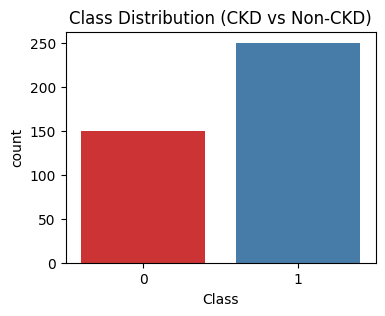

In [177]:
# CountPlot for target variable
plt.figure(figsize=(4,3))
sns.countplot(x=df['Class'], hue=df['Class'], palette="Set1", legend=False)
plt.title("Class Distribution (CKD vs Non-CKD)")
plt.show()

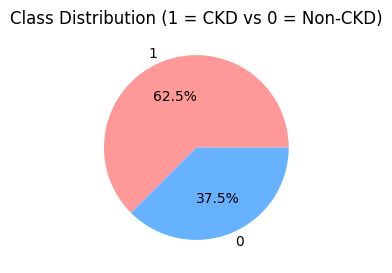

In [178]:
# Create the pie chart
plt.figure(figsize=(4, 3))
plt.pie(df['Class'].value_counts(), labels=df['Class'].value_counts().index, autopct='%1.1f%%', colors=["#FF9999", "#66B2FF"])
plt.title("Class Distribution (1 = CKD vs 0 = Non-CKD)")
plt.show()

======> The pie chart indicates that Chronic Kidney Disease (CKD) cases (62.5%) are more prevalent compared to Non-CKD cases (37.5%) in the dataset.

#### **Visualizaion of Categorical discreate Columns:**  
#### **1. Red Blood Cells**


In [179]:
# Value Counts
print(df['Red Blood Cells'].value_counts())


Red Blood Cells
1.0    353
0.0     47
Name: count, dtype: int64


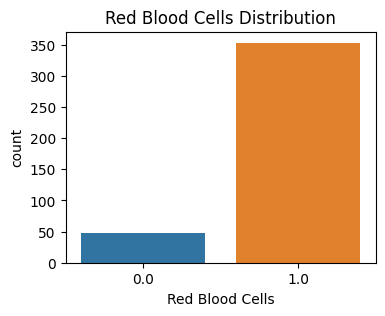

In [180]:
# Distribution of Red Blood Cells
plt.figure(figsize=(4,3) )
sns.countplot(x=df['Red Blood Cells'], hue = df["Red Blood Cells"], legend = False)
plt.title("Red Blood Cells Distribution")
plt.show()

=====> From the plot, it can be concluded that individuals with Red Blood Cells are more prevalent compared to those without Red Blood Cells in the dataset.

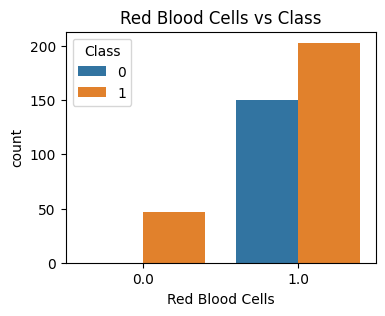

In [181]:
# Relation with Target variable
plt.figure(figsize=(4,3))
sns.countplot(x=df['Red Blood Cells'], hue=df['Class'])
plt.title("Red Blood Cells vs Class")
plt.show()

=====> From the plot, it can be concluded that individuals with Red Blood Cells have high chance of CKD and for non REd blood cells, it also have chance of CKD, indicating a strong relationship between red blood cell distribution and the target variable (Class).

#### **2. Hypertension**

In [182]:
# Value Counts of Hypretension column
print(df['Hypertension'].value_counts())

Hypertension
0.0    253
1.0    147
Name: count, dtype: int64


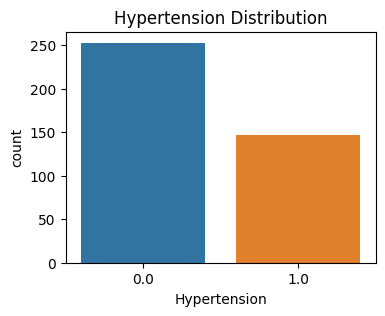

In [183]:
# Distribution of Hyppertension column
plt.figure(figsize=(4,3))
sns.countplot(x=df['Hypertension'], hue = df["Hypertension"], legend=False)
plt.title("Hypertension Distribution")
plt.show()

=====> The plot reveals that in the depicted population, more individuals do not have hypertension (around 250) compared to those who have hypertension (around 150).

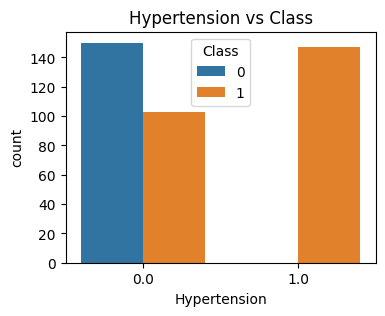

In [184]:
# Relation with Target variable
plt.figure(figsize=(4,3))
sns.countplot(x=df['Hypertension'], hue=df['Class'])
plt.title("Hypertension vs Class")
plt.show()

=====> From above plot, it can be concluded that individual having hypertension have more chance of kidney disease while those without hypertension have a lower risk of CKD.

#### **Visualization of Numerical Columns:**  
**Blood Pressure, Specific Gravity, Albumin, Sugar, Blood Urea, Serum Creatinine, Sodium, Potassium, Hemoglobin, White Blood Cell Count, Red Blood Cell Count**

#### **1. Blood Pressure**

In [185]:
# Value Counts of Blood Pressure
print(df['Blood Pressure'].value_counts())

Blood Pressure
80.0     116
70.0     112
60.0      71
90.0      53
100.0     25
76.0      12
50.0       5
110.0      3
140.0      1
180.0      1
120.0      1
Name: count, dtype: int64


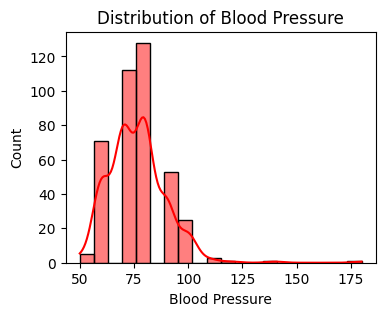

In [186]:
# Distribution Plot of Blood Pressure
plt.figure(figsize=(4,3))
sns.histplot(df['Blood Pressure'], kde=True, bins=20, color = 'red')
plt.title("Distribution of Blood Pressure")
plt.show()

=====> Most blood pressure measurements in the datasets fall within the range of 75-80, showing this is the most common value.

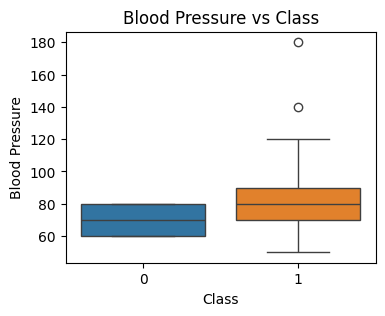

In [187]:
# Relation with Target (Class)
plt.figure(figsize=(4,3))
sns.boxplot(x=df['Class'], y=df['Blood Pressure'], hue = df["Class"], legend = False)
plt.title("Blood Pressure vs Class")
plt.show()

=====> Individuals with kidney disease (1) tend to have higher and more variable blood pressure levels compared to those without kidney disease (0).

#### **2. Specific Gravity**

In [188]:
# Value Counts of Specific Gravity
print("Value Counts of Specific Gravity")
print(df['Specific Gravity'].value_counts())

Value Counts of Specific Gravity
Specific Gravity
1.020    153
1.010     84
1.025     81
1.015     75
1.005      7
Name: count, dtype: int64


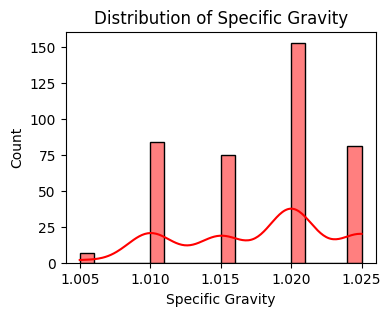

In [189]:
# Distribution Plot of Specific Gravity
plt.figure(figsize=(4, 3))
sns.histplot(df['Specific Gravity'], kde=True, bins=20, color='red')
plt.title("Distribution of Specific Gravity")
plt.show()

=====> The most common specific gravity value is 1.020, observed with the highest count in the distribution.

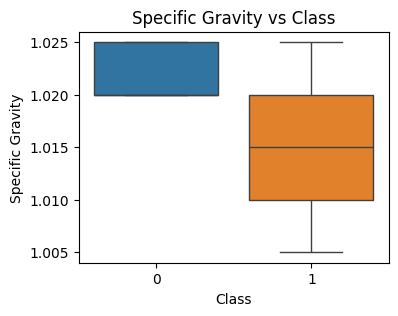

In [190]:
# Relation with Target (Class)
plt.figure(figsize=(4, 3))
sns.boxplot(x=df['Class'], y=df['Specific Gravity'], hue=df["Class"], legend=False)
plt.title("Specific Gravity vs Class")
plt.show()

=====> Individuals with kidney disease tend to have lower specific gravity in their urine, while those without kidney disease generally have higher specific gravity.

#### **3. Albumin**

In [191]:
# Value Counts of Albumin
print("Value Counts of Albumin")
print(df['Albumin'].value_counts())

Value Counts of Albumin
Albumin
0.0    199
1.0     90
2.0     43
3.0     43
4.0     24
5.0      1
Name: count, dtype: int64


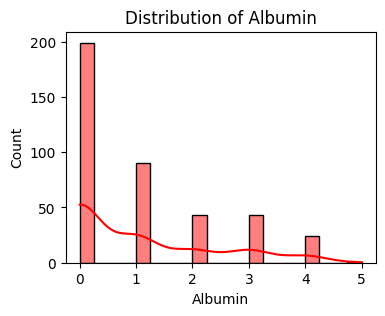

In [192]:
# Distribution Plot of Albumin
plt.figure(figsize=(4, 3))
sns.histplot(df['Albumin'], kde=True, bins=20, color='red')
plt.title("Distribution of Albumin")
plt.show()

=====> Most individuals have an albumin level of 0, while higher levels occur less frequently.

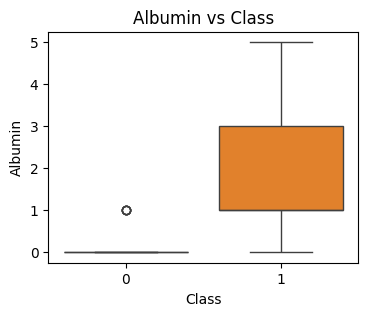

In [193]:
# Relation with Target (Class)
plt.figure(figsize=(4, 3))
sns.boxplot(x=df['Class'], y=df['Albumin'], hue=df["Class"], legend=False)
plt.title("Albumin vs Class")
plt.show()

=====> From the image, it can be concluded that individuals with kidney disease (1) tend to have higher and more variable albumin levels compared to those without kidney disease (0), who generally have very low albumin levels.

#### **4. Sugar**

In [194]:
# Value Counts of Sugar
print(df['Sugar'].value_counts())

Sugar
0.0    339
2.0     18
3.0     14
4.0     13
1.0     13
5.0      3
Name: count, dtype: int64


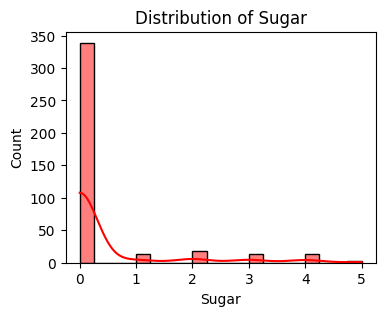

In [195]:
# Distribution Plot of Sugar
plt.figure(figsize=(4, 3))
sns.histplot(df['Sugar'], kde=True, bins=20, color='red')
plt.title("Distribution of Sugar")
plt.show()

=====> The histogram reveals that most individuals have a sugar level of 0, with significantly fewer counts for higher sugar levels ranging from 1 to 5. This indicates a skewed distribution.

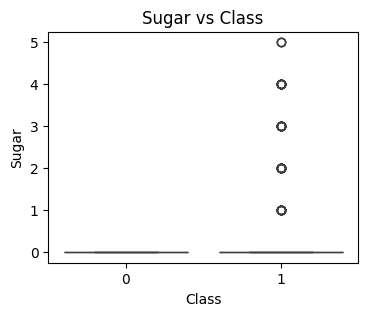

In [196]:
# Relation with Target (Class)
plt.figure(figsize=(4, 3))
sns.boxplot(x=df['Class'], y=df['Sugar'], hue=df["Class"], legend=False)
plt.title("Sugar vs Class")
plt.show()

=====> From the plot, it can be concluded that individuals with kidney disease (1) exhibit a wider range of sugar levels (1–5), whereas those without kidney disease (0) mostly have a sugar level of 0.

#### **5. Blood Urea**

In [197]:
# Value Counts of Blood Urea
print(df['Blood Urea'].value_counts())

Blood Urea
57.0     20
46.0     15
25.0     13
19.0     11
40.0     10
         ..
92.0      1
322.0     1
162.0     1
235.0     1
165.0     1
Name: count, Length: 118, dtype: int64


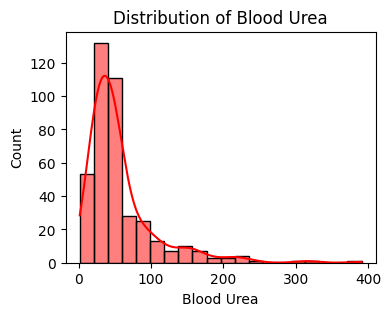

In [198]:
# Distribution Plot of Blood Urea
plt.figure(figsize=(4, 3))
sns.histplot(df['Blood Urea'], kde=True, bins=20, color='red')
plt.title("Distribution of Blood Urea")
plt.show()

=====> The histogram shows that blood urea levels are predominantly concentrated between 0 and 100, with higher levels occurring less frequently. The distribution is right-skewed, indicating the majority of individuals have lower blood urea levels.

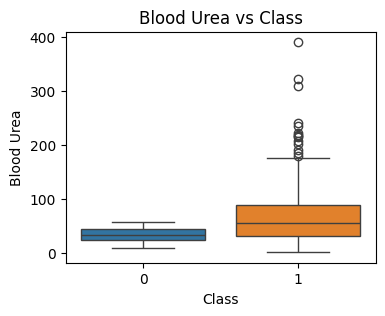

In [199]:
# Relation with Target (Class)
plt.figure(figsize=(4, 3))
sns.boxplot(x=df['Class'], y=df['Blood Urea'], hue=df["Class"], legend=False)
plt.title("Blood Urea vs Class")
plt.show()

=====> The box plot shows that individuals with kidney disease (1) generally have higher and more variable blood urea levels, along with several outliers, compared to individuals without kidney disease (0), who exhibit lower and more consistent levels.

#### **6. Serum Creatinine**

In [200]:
# Value Counts of Serum Creatinine
print("Value Counts of Serum Creatinine")
print(df['Serum Creatinine'].value_counts())

Value Counts of Serum Creatinine
Serum Creatinine
1.2     40
1.1     24
0.5     23
1.0     23
0.9     22
        ..
9.2      1
13.8     1
9.7      1
24.0     1
0.4      1
Name: count, Length: 85, dtype: int64


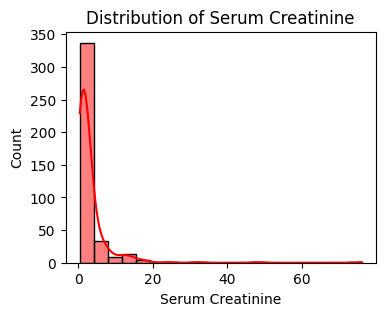

In [201]:
# Distribution Plot of Serum Creatinine
plt.figure(figsize=(4, 3))
sns.histplot(df['Serum Creatinine'], kde=True, bins=20, color='red')
plt.title("Distribution of Serum Creatinine")
plt.show()


=====> The plot shows that serum creatinine levels are predominantly concentrated between 0 and 5, with much lower frequencies observed as the levels increase beyond this range.

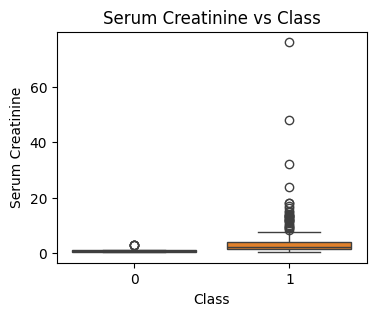

In [202]:
# Relation with Target (Class)
plt.figure(figsize=(4, 3))
sns.boxplot(x=df['Class'], y=df['Serum Creatinine'], hue=df["Class"], legend=False)
plt.title("Serum Creatinine vs Class")
plt.show()

=====> The box plot shows that individuals with kidney disease (1) have significantly higher and more variable serum creatinine levels compared to those without kidney disease (0), who exhibit lower and more consistent levels.

#### **7. Sodium**

In [203]:
# Value Counts of Sodium
print(df['Sodium'].value_counts())

Sodium
137.53    87
135.00    40
140.00    25
141.00    22
139.00    21
142.00    20
138.00    20
137.00    19
150.00    17
136.00    17
147.00    13
145.00    11
146.00    10
132.00    10
144.00     9
131.00     9
133.00     8
130.00     7
134.00     6
143.00     4
127.00     3
124.00     3
114.00     2
125.00     2
120.00     2
113.00     2
128.00     2
122.00     2
104.00     1
129.00     1
115.00     1
4.50       1
163.00     1
111.00     1
126.00     1
Name: count, dtype: int64


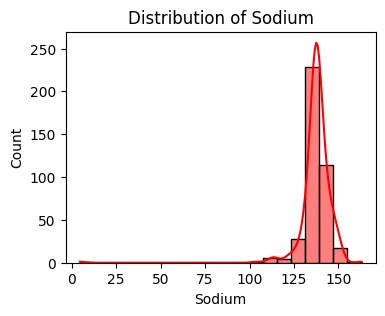

In [204]:
# Distribution Plot of Sodium
plt.figure(figsize=(4, 3))
sns.histplot(df['Sodium'], kde=True, bins=20, color='red')
plt.title("Distribution of Sodium")
plt.show()

=====> The histogram shows that most sodium levels are concentrated between 125 and 150, peaking around 135, which represents the most common range in the distribution.

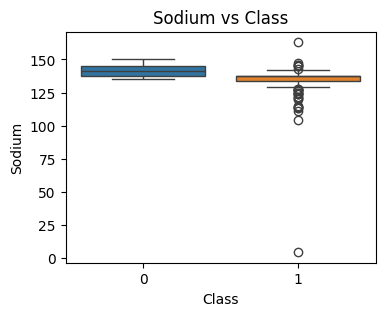

In [205]:
# Relation with Target (Class)
plt.figure(figsize=(4, 3))
sns.boxplot(x=df['Class'], y=df['Sodium'], hue=df["Class"], legend=False)
plt.title("Sodium vs Class")
plt.show()

=====> The box plot shows that individuals with kidney disease (1) tend to have slightly lower and more variable sodium levels compared to those without kidney disease (0), who exhibit a tighter distribution around higher sodium levels.

#### **8. Potassium**

In [206]:
# Value Counts of Potassium
print(df['Potassium'].value_counts())

Potassium
4.63     88
3.50     30
5.00     30
4.90     27
4.70     17
4.80     16
4.00     14
4.10     14
4.40     14
3.90     14
3.80     14
4.20     14
4.50     13
4.30     12
3.70     12
3.60      8
4.60      7
3.40      5
5.20      5
5.70      4
5.30      4
6.30      3
5.40      3
2.90      3
3.30      3
5.50      3
3.20      3
2.50      2
5.90      2
5.80      2
5.60      2
3.00      2
6.50      2
7.60      1
39.00     1
6.40      1
47.00     1
5.10      1
2.80      1
2.70      1
6.60      1
Name: count, dtype: int64


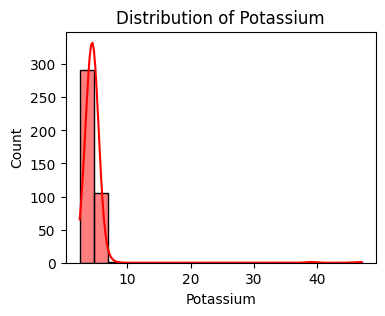

In [207]:
# Distribution Plot of Potassium
plt.figure(figsize=(4, 3))
sns.histplot(df['Potassium'], kde=True, bins=20, color='red')
plt.title("Distribution of Potassium")
plt.show()

=====> The histogram plot shows that potassium levels are mostly concentrated between 0 and 15, with the highest frequency around 4-5. The distribution goes off significantly at higher potassium levels.

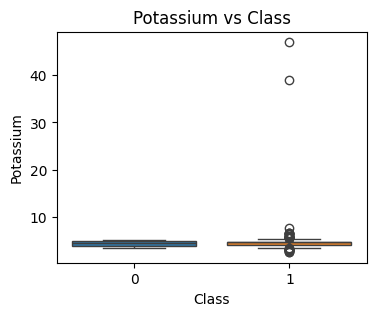

In [208]:
# Relation with Target variable
plt.figure(figsize=(4, 3))
sns.boxplot(x=df['Class'], y=df['Potassium'], hue=df["Class"], legend=False)
plt.title("Potassium vs Class")
plt.show()

=====> From the box plot, it can be concluded that individuals with kidney disease (1) tend to have higher potassium levels with more variability and outliers, while those without kidney disease (0) generally have lower and more consistent potassium levels.

#### **9. Hemoglobin**

In [209]:
# Value Counts of Hemoglobin
print("Value Counts of Hemoglobin")
print(df['Hemoglobin'].value_counts())

Value Counts of Hemoglobin
Hemoglobin
12.53    52
15.00    16
10.90     8
13.60     7
13.00     7
         ..
6.80      1
8.50      1
7.30      1
12.80     1
17.60     1
Name: count, Length: 116, dtype: int64


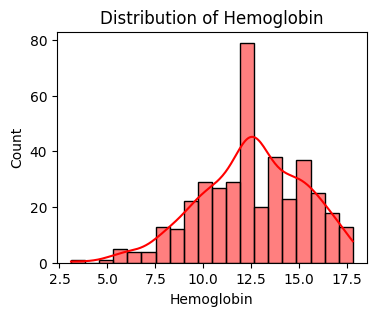

In [210]:
# Distribution Plot of Hemoglobin
plt.figure(figsize=(4, 3))
sns.histplot(df['Hemoglobin'], kde=True, bins=20, color='red')
plt.title("Distribution of Hemoglobin")
plt.show()

=====> The histogram shows that hemoglobin levels are mostly concentrated around 12.5, making it the most common value in the people.

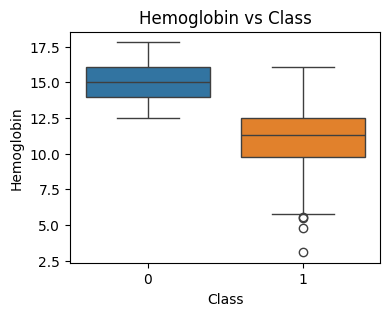

In [211]:
# Relation with Target variable
plt.figure(figsize=(4, 3))
sns.boxplot(x=df['Class'], y=df['Hemoglobin'], hue=df["Class"], legend=False)
plt.title("Hemoglobin vs Class")
plt.show()

=====> From the box plot, it can be concluded that individuals with kidney disease (1) tend to have lower hemoglobin levels and greater variability compared to those without kidney disease (0), who generally have higher and more consistent hemoglobin levels.

#### **10. White Blood Cell Count**

In [212]:
# Value Counts of White Blood Cell Count
print(df['White Blood Cell Count'].value_counts())

White Blood Cell Count
8406.0     106
9800.0      11
6700.0      10
9600.0       9
7200.0       9
          ... 
19100.0      1
12300.0      1
16700.0      1
14900.0      1
2600.0       1
Name: count, Length: 90, dtype: int64


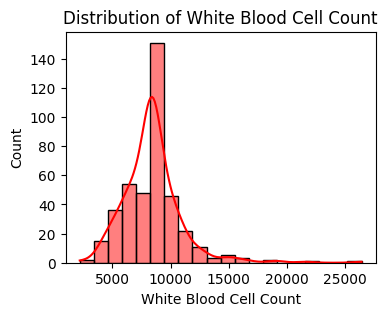

In [213]:
# Distribution Plot of White Blood Cell Count
plt.figure(figsize=(4, 3))
sns.histplot(df['White Blood Cell Count'], kde=True, bins=20, color='red')
plt.title("Distribution of White Blood Cell Count")
plt.show()

=====> The histogram shows that most white blood cell counts are clustered around 10,000, with fewer instances at higher levels. The distribution is right-skewed, indicating that lower counts are more common.

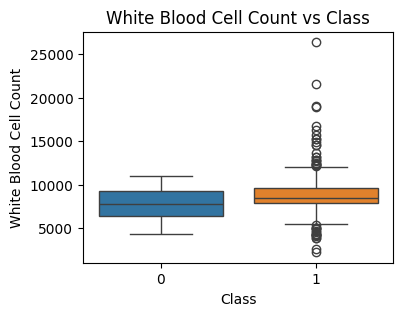

In [214]:
# Relation with Target variable (Class)
plt.figure(figsize=(4, 3))
sns.boxplot(x=df['Class'], y=df['White Blood Cell Count'], hue=df["Class"], legend=False)
plt.title("White Blood Cell Count vs Class")
plt.show()

=====> The box plot shows that individuals with kidney disease (1) tend to have slightly higher and more variable white blood cell counts, with several outliers, compared to individuals without kidney disease (0), whose counts are more consistent and centered around the median.

#### **11. Red Blood Cell Count**

In [215]:
# Value Counts of Red Blood Cell Count
print("# Value Counts of Red Blood Cell Count")
print(df['Red Blood Cell Count'].value_counts())

# Value Counts of Red Blood Cell Count
Red Blood Cell Count
4.71    131
5.20     18
4.50     16
4.90     14
4.70     11
3.90     10
5.00     10
4.80     10
4.60      9
3.40      9
5.90      8
3.70      8
6.10      8
5.50      8
5.40      7
5.30      7
5.80      7
3.80      7
4.20      6
4.30      6
4.00      6
5.60      6
5.10      5
6.20      5
6.40      5
5.70      5
6.50      5
4.10      5
4.40      5
3.20      5
6.00      4
3.60      4
6.30      4
3.30      3
3.00      3
3.50      3
2.60      2
2.80      2
2.90      2
2.50      2
2.70      2
2.10      2
3.10      2
2.30      1
2.40      1
8.00      1
Name: count, dtype: int64


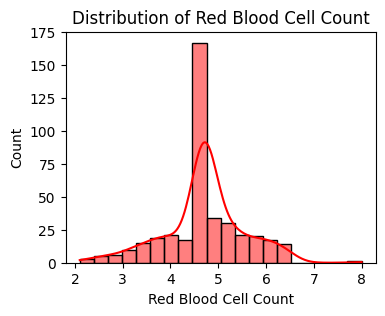

In [216]:
# Distribution Plot of Red Blood Cell Count
plt.figure(figsize=(4, 3))
sns.histplot(df['Red Blood Cell Count'], kde=True, bins=20, color='red')
plt.title("Distribution of Red Blood Cell Count")
plt.show()

=====> The histogram shows that red blood cell counts are most commonly centered around 5, indicating this is the most frequent value in the dataset.

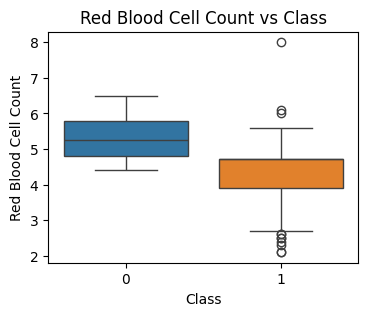

In [217]:
# Relation with Target variable
plt.figure(figsize=(4, 3))
sns.boxplot(x=df['Class'], y=df['Red Blood Cell Count'], hue=df["Class"], legend=False)
plt.title("Red Blood Cell Count vs Class")
plt.show()

=====> From the box plot, it can be concluded that individuals with kidney disease (1) tend to have lower red blood cell counts and higher variability, including outliers, compared to those without kidney disease (0), who generally have higher and more consistent red blood cell counts.

#### **Correlation of Features with Target (Class)**

In [218]:
# Compute correlation of all features with target 'Class'
corr_with_target = df.corr()['Class'].sort_values(ascending=False)
print(corr_with_target)

Class                     1.000000
Albumin                   0.598389
Hypertension              0.590438
Blood Urea                0.371982
Sugar                     0.294555
Serum Creatinine          0.294076
Blood Pressure            0.290145
White Blood Cell Count    0.205266
Potassium                 0.077063
Red Blood Cells          -0.282642
Sodium                   -0.342268
Red Blood Cell Count     -0.590248
Specific Gravity         -0.659504
Hemoglobin               -0.729537
Name: Class, dtype: float64


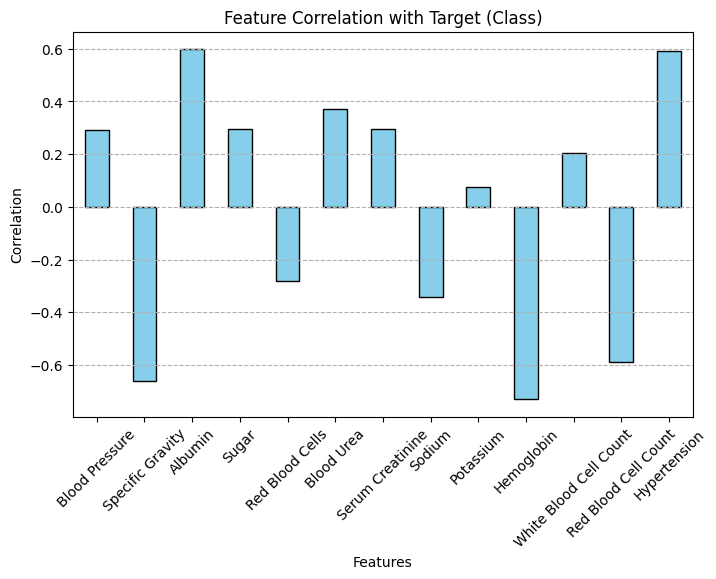

In [219]:
# correlation plot
plt.figure(figsize=(8, 5))
df.drop(columns=['Class']).corrwith(df["Class"]).plot.bar(color='skyblue', edgecolor='black')
plt.title("Feature Correlation with Target (Class)")
plt.xlabel("Features")
plt.ylabel("Correlation")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.show()

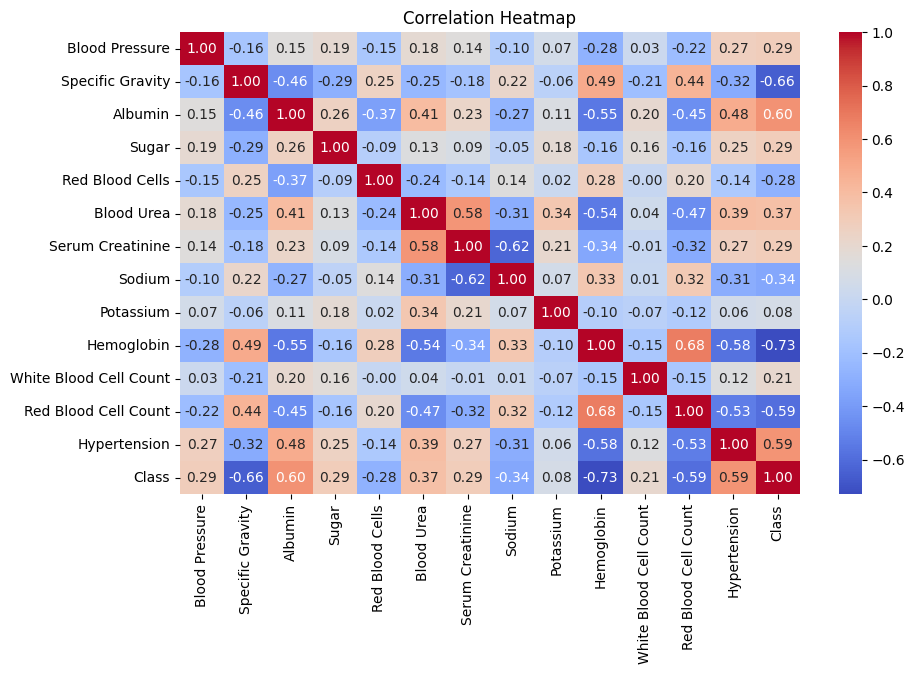

In [220]:
# Correlation Heatmap (Among All Features & Target)
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


### **Step 4: Data Cleaning**
Data cleaning involves handling missing values, duplicate values, and outliers to ensure the dataset is ready for modeling.

In [221]:
# Check the missing values
df.isnull().sum()

Blood Pressure            0
Specific Gravity          0
Albumin                   0
Sugar                     0
Red Blood Cells           0
Blood Urea                0
Serum Creatinine          0
Sodium                    0
Potassium                 0
Hemoglobin                0
White Blood Cell Count    0
Red Blood Cell Count      0
Hypertension              0
Class                     0
dtype: int64

In [222]:
# Check the duplicates values
df.duplicated().sum()

0

In [223]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Blood Pressure          400 non-null    float64
 1   Specific Gravity        400 non-null    float64
 2   Albumin                 400 non-null    float64
 3   Sugar                   400 non-null    float64
 4   Red Blood Cells         400 non-null    float64
 5   Blood Urea              400 non-null    float64
 6   Serum Creatinine        400 non-null    float64
 7   Sodium                  400 non-null    float64
 8   Potassium               400 non-null    float64
 9   Hemoglobin              400 non-null    float64
 10  White Blood Cell Count  400 non-null    float64
 11  Red Blood Cell Count    400 non-null    float64
 12  Hypertension            400 non-null    float64
 13  Class                   400 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 43.

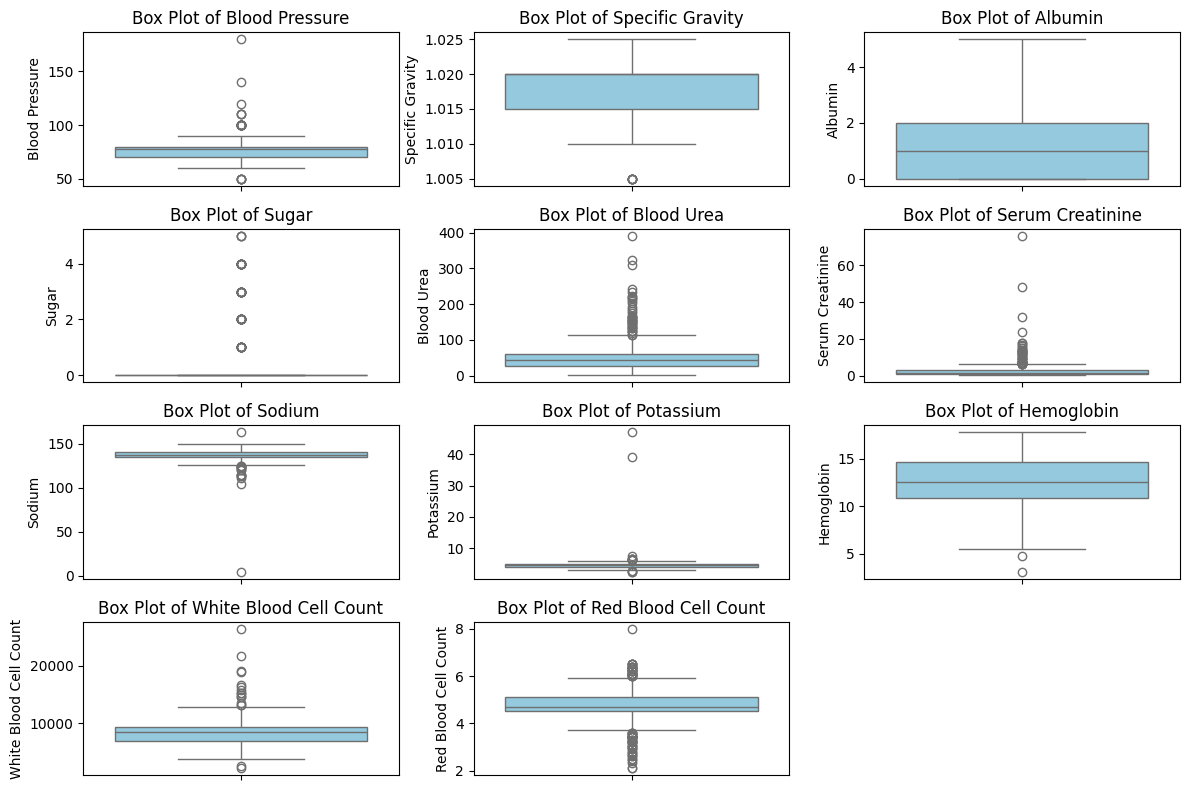

In [224]:
# Check the outliers present numerical columns
num_cols = [
    'Blood Pressure', 'Specific Gravity', 'Albumin', 'Sugar', 'Blood Urea', 
    'Serum Creatinine', 'Sodium', 'Potassium', 'Hemoglobin', 
    'White Blood Cell Count', 'Red Blood Cell Count'
]

plt.figure(figsize=(12, 8))

for i, col in enumerate(num_cols, 1):
    plt.subplot(4, 3, i)  # Creating subplots
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(f"Box Plot of {col}")

plt.tight_layout() 
plt.show()

=====> From above box plot of different features, we can see that some features contain outliers.

In [225]:
# Function to remove outliers using IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

# Apply to numerical columns
for col in num_cols:
    remove_outliers(df, col)

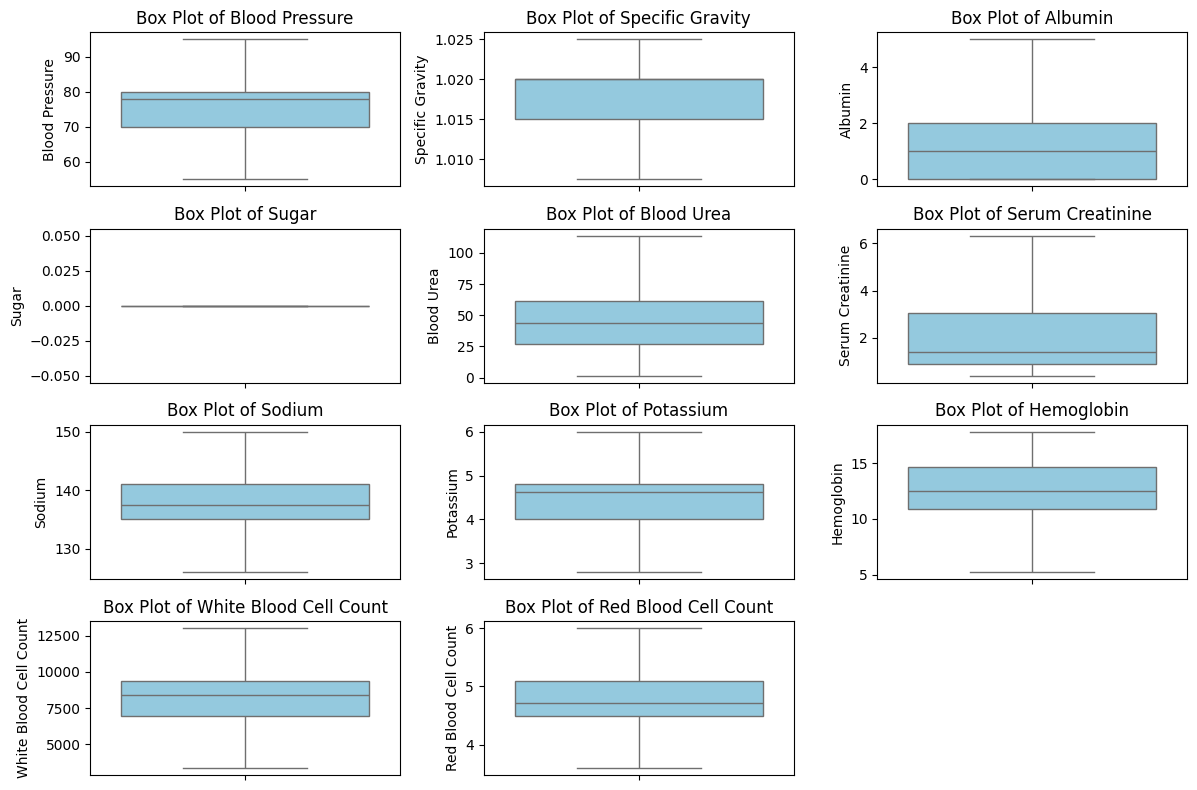

In [226]:
# Verify that the outliers are present or not
plt.figure(figsize=(12, 8))

for i, col in enumerate(num_cols, 1):
    plt.subplot(4, 3, i)  # Creating subplots
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(f"Box Plot of {col}")

plt.tight_layout() 
plt.show()

In [227]:
# Shape of the dataset
df.shape

(400, 14)

In [228]:
# Cleaned dataset
df.head()

,Blood Pressure,Specific Gravity,Albumin,Sugar,Red Blood Cells,Blood Urea,Serum Creatinine,Sodium,Potassium,Hemoglobin,White Blood Cell Count,Red Blood Cell Count,Hypertension,Class
0,80.0,1.0200,1.0,0.0,1.0,36.0,1.2,137.53,4.63,15.4,7800.0,5.20,1.0,1
1,55.0,1.0200,4.0,0.0,1.0,18.0,0.8,137.53,4.63,11.3,6000.0,4.71,0.0,1
2,80.0,1.0100,2.0,0.0,1.0,53.0,1.8,137.53,4.63,9.6,7500.0,4.71,0.0,1
3,70.0,1.0075,4.0,0.0,1.0,56.0,3.8,126.00,2.80,11.2,6700.0,3.90,1.0,1
4,80.0,1.0100,2.0,0.0,1.0,26.0,1.4,137.53,4.63,11.6,7300.0,4.60,0.0,1


#### **Step 5: Split the data into train and test**

In [229]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df.drop(columns=['Class'])  # Independent variables
y = df['Class']  # Target variable

# Split into 80% Train and 20% Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display the shape of train and test sets
print(f"Train Set: {X_train.shape}, Test Set: {X_test.shape}")

Train Set: (320, 13), Test Set: (80, 13)


In [230]:
# Print the shape of train and test sets
print("Train Set Shape (X_train, y_train):", X_train.shape, y_train.shape)
print("Test Set Shape (X_test, y_test):", X_test.shape, y_test.shape)

Train Set Shape (X_train, y_train): (320, 13) (320,)
Test Set Shape (X_test, y_test): (80, 13) (80,)


#### **Step 6: Data Preprocessing**
Here, when and where we use the standardization and Normalization for numerical columns
| **Algorithm** | **Standardization (Z-score)** | **Normalization (Min-Max)** | **Reason** |
|--------------|------------------|----------------|---------|
| **A: Logistic Regression** | ✅ Yes | ❌ No | Sensitive to feature scaling, works best with standardization |
| **B: Naive Bayes** | ❌ No | ❌ No | Doesn't require feature scaling since it relies on probability distributions |
| **C: Support Vector Machine (SVM)** | ✅ Yes | ❌ No | Distance-based model, requires standardization for optimal performance |
| **D: Random Forest** | ❌ No | ❌ No | Tree-based models are scale-invariant, no need for scaling |
| **E: XGBoost** | ❌ No | ❌ No | Handles unscaled data well, scaling is not required |
| **F: K-Nearest Neighbors (KNN)** | ✅ Yes | ❌ No | Distance-based model, requires standardization |

In [231]:
# Identify categorical and numerical columns
cat_cols = ['Red Blood Cells', 'Hypertension']
num_cols = ['Blood Pressure', 'Specific Gravity', 'Albumin', 'Sugar', 
                  'Blood Urea', 'Serum Creatinine', 'Sodium', 'Potassium', 
                  'Hemoglobin', 'White Blood Cell Count', 'Red Blood Cell Count']

# Initialize StandardScaler
scaler = StandardScaler()

# Fit on training data and transform both train & test sets
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

# No need encoding to categorical columns because they laready in 0 and 1.

In [232]:
# Concatenate standardized numerical columns and categorical columns
X_train_final = pd.concat([X_train[num_cols], X_train[cat_cols]], axis=1)
X_test_final = pd.concat([X_test[num_cols], X_test[cat_cols]], axis=1)

# Print the shape of the final train and test datasets
print("Final X Train Set Shape:", X_train_final.shape)
print("Final X Test Set Shape:", X_test_final.shape)

Final X Train Set Shape: (320, 13)
Final X Test Set Shape: (80, 13)


#### **Step 6: Model Building & Evaluation**

In [233]:
# Import Required Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report


In [234]:
# Initialize Models
models = {
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": GaussianNB(),
    "Support Vector Machine": SVC(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

In [235]:
# Train, Predict & Evaluate Models
# Store results
results = {}

for name, model in models.items():
    print(f"\n Training {name}...\n")
    
    # Train the model
    model.fit(X_train_final, y_train)
    
    # Predictions on train and test sets
    y_train_pred = model.predict(X_train_final)
    y_test_pred = model.predict(X_test_final)
    
    # Evaluation Metrics
    metrics = {
        "Train Accuracy": accuracy_score(y_train, y_train_pred),
        "Test Accuracy": accuracy_score(y_test, y_test_pred),
        "Train Precision": precision_score(y_train, y_train_pred),
        "Test Precision": precision_score(y_test, y_test_pred),
        "Train Recall": recall_score(y_train, y_train_pred),
        "Test Recall": recall_score(y_test, y_test_pred),
        "Train F1 Score": f1_score(y_train, y_train_pred),
        "Test F1 Score": f1_score(y_test, y_test_pred)
    }
    
    # Store metrics in results dictionary
    results[name] = metrics
    
    # Print classification report
    print(f"Classification Report for {name}:\n", classification_report(y_test, y_test_pred))



 Training Logistic Regression...

Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97        30
           1       1.00      0.96      0.98        50

    accuracy                           0.97        80
   macro avg       0.97      0.98      0.97        80
weighted avg       0.98      0.97      0.98        80


 Training Naive Bayes...

Classification Report for Naive Bayes:
               precision    recall  f1-score   support

           0       0.79      1.00      0.88        30
           1       1.00      0.84      0.91        50

    accuracy                           0.90        80
   macro avg       0.89      0.92      0.90        80
weighted avg       0.92      0.90      0.90        80


 Training Support Vector Machine...

Classification Report for Support Vector Machine:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97        3

In [236]:
# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results).T
print("Model Performance Summary:")
results_df

Model Performance Summary:


,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train Recall,Test Recall,Train F1 Score,Test F1 Score
Logistic Regression,0.993750,0.975,0.995000,1.00,0.995,0.96,0.995000,0.979592
Naive Bayes,0.909375,0.900,1.000000,1.00,0.855,0.84,0.921833,0.913043
Support Vector Machine,0.987500,0.975,0.990000,1.00,0.990,0.96,0.990000,0.979592
Random Forest,1.000000,1.000,1.000000,1.00,1.000,1.00,1.000000,1.000000
XGBoost,1.000000,0.975,1.000000,0.98,1.000,0.98,1.000000,0.980000
K-Nearest Neighbors,0.968750,0.975,0.984694,1.00,0.965,0.96,0.974747,0.979592


#### **Step 7: Model Comparison (Accuracy Analysis)**

In [237]:
# Extract accuracy scores from results
accuracy_df = results_df[['Train Accuracy', 'Test Accuracy']].copy()

# Display table
print("Model Accuracy Comparison Table:")
accuracy_df


Model Accuracy Comparison Table:


,Train Accuracy,Test Accuracy
Logistic Regression,0.993750,0.975
Naive Bayes,0.909375,0.900
Support Vector Machine,0.987500,0.975
Random Forest,1.000000,1.000
XGBoost,1.000000,0.975
K-Nearest Neighbors,0.968750,0.975


<Figure size 800x400 with 0 Axes>

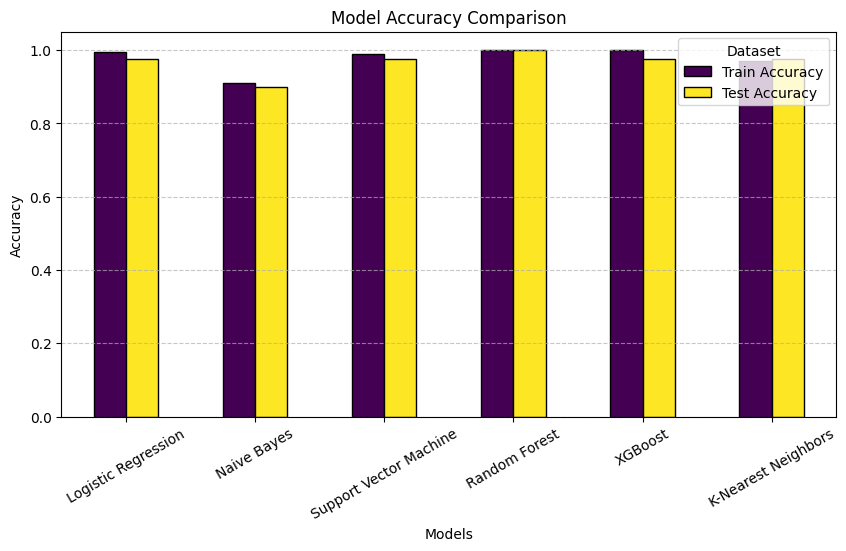

In [238]:
# Visualize Accuracy Comparison Using a Bar Plot
plt.figure(figsize=(8,4))
accuracy_df.plot(kind='bar', figsize=(10, 5), colormap='viridis', edgecolor='black')
plt.title('Model Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.xticks(rotation=30)
plt.legend(title='Dataset')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


=====> Based on the Train and Test Accuracy, the Random Forest model is the best since it achieved 100% accuracy on both Train and Test data.

### **Step 8: Feature Selection & Model Saving**

In [ ]:
# Best model
model = RandomForestClassifier()
model.fit(X_train_final, y_train)

# Get feature importances from Random Forest
feature_importances = model.feature_importances_ 
feature_names = X.columns  # Extract feature names

# Convert to DataFrame and sort by importance
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print Feature Importance
print(feature_importance_df)

                   Feature  Importance
8                Potassium    0.260058
5               Blood Urea    0.151154
2                  Albumin    0.151043
10  White Blood Cell Count    0.139017
1         Specific Gravity    0.133802
12            Hypertension    0.064692
4          Red Blood Cells    0.034301
6         Serum Creatinine    0.023911
0           Blood Pressure    0.016978
9               Hemoglobin    0.012560
7                   Sodium    0.009449
11    Red Blood Cell Count    0.003034
3                    Sugar    0.000000


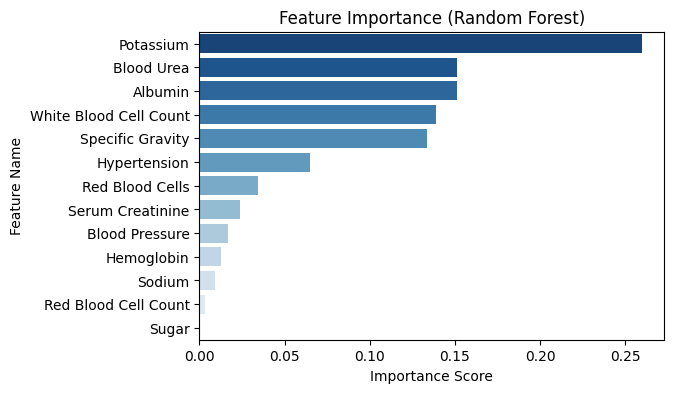

In [246]:
# Plot feature importance
plt.figure(figsize=(6, 4))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette="Blues_r", hue = "Feature", legend=False)
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature Name")
plt.show()

#### **Step 9: Model Saved and Prediction on new Datasets**

In [248]:
import joblib

# Save the trained Random Forest model
joblib.dump(model, 'Models/best_model.pkl')

# Save the StandardScaler
joblib.dump(scaler, 'Models/scaler.pkl')
print("Model saved successfully...")

Model saved successfully...


In [262]:
# Load saved model and scaler
loaded_model = joblib.load('Models/best_model.pkl')
loaded_scaler = joblib.load('Models/scaler.pkl')
print("Model loaded successfully...")

Model loaded successfully...


In [263]:
X_test_final.columns

Index(['Blood Pressure', 'Specific Gravity', 'Albumin', 'Sugar', 'Blood Urea',
       'Serum Creatinine', 'Sodium', 'Potassium', 'Hemoglobin',
       'White Blood Cell Count', 'Red Blood Cell Count', 'Red Blood Cells',
       'Hypertension'],
      dtype='object')

In [279]:
# New patient data with 13 input features
new_data = pd.DataFrame([{
    'Blood Pressure': 120,
    'Specific Gravity': 1.020,
    'Albumin': 2,
    'Sugar': 1,
    'Blood Urea': 35,
    'Serum Creatinine': 1.2,
    'Sodium': 140,
    'Potassium': 4.5,
    'Hemoglobin': 13.5,
    'White Blood Cell Count': 7800,
    'Red Blood Cell Count': 5.2,
    'Red Blood Cells': 1,  # Categorical (0 or 1)
    'Hypertension': 0       # Categorical (0 or 1)
}])


In [280]:
# Define numerical and categorical columns
num_cols = ['Blood Pressure', 'Specific Gravity', 'Albumin', 'Sugar', 
            'Blood Urea', 'Serum Creatinine', 'Sodium', 'Potassium', 
            'Hemoglobin', 'White Blood Cell Count', 'Red Blood Cell Count']

cat_cols = ['Red Blood Cells', 'Hypertension']  # Categorical columns (no scaling)

# Apply StandardScaler only to numerical columns
new_data_scaled = new_data.copy()
new_data_scaled[num_cols] = loaded_scaler.transform(new_data[num_cols])

In [281]:
# Predict using the trained Random Forest model
prediction = loaded_model.predict(new_data_scaled)

# Convert prediction to meaningful output
if prediction[0] == 1:
    print("Prediction: The person is likely to have kidney disease.")
else:
    print("Prediction: The person is unlikely to have kidney disease.")

Prediction: The person is unlikely to have kidney disease.
